# Comparing Ketamine and Midazolam after treatment in ROIs
Plot differences between the group in the amygdala, as requested by Reviewer #

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import relevant packages
import glob
import numpy as np
import scipy
import nilearn
import nilearn.image
import nilearn.plotting
import nilearn.input_data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc3 as pm
import arviz as az
#from pymc3.glm import GLM

In [3]:
# in case we want frequency stats
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
# Set session
ses = 2
## Grab group
# compare between groups

medication_cond = pd.read_csv('/home/oad4/ketamine_reconsolidation/kpe_sub_condition.csv')

func_files = glob.glob('/gpfs/gibbs/pi/levy_ifat/Or/kpe/results/ScriptPart_ses%s/modelfit/_subject_id_*/modelestimate/results/zstat7.nii.gz' %(ses))

func_files.sort()
len(func_files)

26

In [5]:
# remove 1315
del func_files[6] #(only session 1,2)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


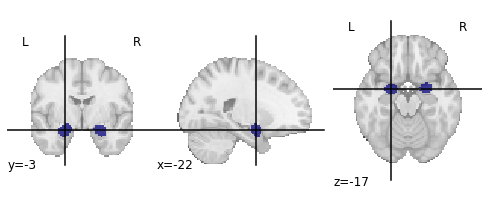

In [36]:
## Amygdala as mask
mask_file = '/gpfs/gibbs/pi/levy_ifat/Or/ROI/amygdala_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=25", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)


masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                                smoothing_fwhm=None, standardize=False,
                                        detrend=False, verbose=9).fit()

In [7]:
t_arr = []
mean_act = []
scr_id = []
#delayed_get_data = dask.delayed(masker.fit_transform)
for func in func_files:
    # get subject number
    scr_id.append('KPE' + func.split('id_')[1].split('/')[0])
    # get average activation
    t_map = masker.transform(func)[0]
    t_arr.append(t_map)
    


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. 

[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extra

In [8]:
t_arrArray = np.array(t_arr)

In [9]:
df_ses2 = []
df_ses2 = pd.DataFrame({'scr_id': scr_id, 'amg2': t_arr})
df_ses2 = pd.merge(medication_cond, df_ses2)
df_ses2 = df_ses2.rename(columns={'med_cond': 'group'})
#df['goup'] = medication_cond['med_cond']
df_ses2 = df_ses2.replace(to_replace={'group': {0.0:'midazolam', 1.0:'ketamine'}})

In [10]:
df_ses2.group.values =='ketamine'

array([ True,  True, False, False,  True,  True,  True,  True,  True,
       False, False, False, False,  True, False, False,  True,  True,
       False, False,  True, False,  True,  True, False])

In [28]:
ketArra = t_arrArray[df_ses2.group.values=='ketamine']
midArra = t_arrArray[df_ses2.group.values=='midazolam']
midArra.shape

(12, 559)

In [29]:
t, p = scipy.stats.ttest_ind(ketArra, midArra)
print(t.shape)
t

(559,)


array([-1.12594807e+00, -2.89468980e+00, -1.19418204e+00, -2.38137078e+00,
       -1.63201503e-02, -2.55730796e+00, -1.96449518e+00, -1.66207278e+00,
       -1.18856978e+00, -2.03607440e+00, -2.59839416e+00, -8.22173297e-01,
       -5.53500056e-01,  6.91942796e-02,  8.96958947e-01, -1.61348259e+00,
       -8.42586637e-01, -5.05727291e-01,  7.02171266e-01,  4.93793905e-01,
        1.25210345e+00, -2.48246861e+00, -2.26509380e+00, -1.14190221e+00,
       -6.71763718e-01, -4.93445098e-01, -4.91369390e+00, -3.55457449e+00,
       -9.03821886e-01, -9.15181339e-01,  3.02564740e-01, -2.06740260e+00,
       -1.53751421e+00,  1.62039268e+00, -1.75809395e+00, -3.85454154e+00,
       -1.49989533e+00, -1.06497610e+00,  6.97073281e-01, -4.92099449e-02,
       -2.06885386e+00, -2.54718709e+00, -2.69368386e+00, -2.41591826e-01,
        8.19756210e-01, -1.92495123e-01, -3.00051063e-01, -2.83450627e+00,
       -2.00449824e+00, -9.78520811e-01,  7.60153234e-01,  1.21274114e+00,
        4.87190485e-02,  

In [13]:
sum(p<0.05)

69

In [14]:
# save t map
img = masker.inverse_transform(t)
#img.to_filename('amygdala_ketVsmid_ses2.nii.gz')

In [14]:
bg_img = '/gpfs/gibbs/pi/levy_ifat/Or/avg152T1.nii'

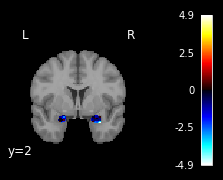

In [15]:
fig = nilearn.plotting.plot_stat_map(masker.inverse_transform(t), display_mode='y',cut_coords=1, 
                               black_bg=True)#, bg_img = bg_img)#, output_file='amygdala_groupComp.pdf', dpi=300)
#fig.savefig('amygdala_groupComp.svg', dpi=1200)

In [ ]:
# calculate in z score
t_z = scipy.stats.zscore(t)
fig = nilearn.plotting.plot_stat_map(masker.inverse_transform(t_z), display_mode='y',cut_coords=1, 
                               black_bg=True)#, bg_img = bg_img)#, output_file='amygdala_groupComp.pdf', dpi=300)
fig.savefig('amygdala_groupComp_z.svg', dpi=1200)

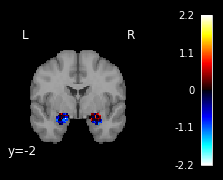

In [17]:
## one last option. Just subtract the mean of K group from mean of M group
subtract_z = np.mean(ketArra, axis=0) - np.mean(midArra, axis=0)
fig = nilearn.plotting.plot_stat_map(masker.inverse_transform(subtract_z), display_mode='y',cut_coords=1, 
                               black_bg=True)#, bg_img = bg_img)#, output_file='amygdala_groupComp.pdf', dpi=300)
#fig.savefig('amygdala_groupComp_sub.svg', dpi=1200)

The mean difference is -0.34545326232910156, CI90% is [-1.23103633  0.49224368]


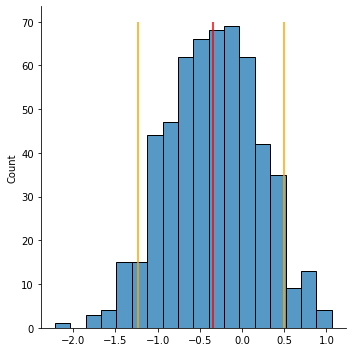

In [26]:
sns.displot(subtract_z)
print(f'The mean difference is {np.mean(subtract_z)}, CI90% is {np.quantile(subtract_z, [0.05, 0.95])}')
plt.vlines(np.mean(subtract_z), ymin=0, ymax=70, color='red')
plt.vlines(np.quantile(subtract_z, [0.05]), ymin=0, ymax=70, color='orange')
plt.vlines(np.quantile(subtract_z, [0.95]), ymin=0, ymax=70, color='orange')

# threshold

In [32]:
from statsmodels.stats.multitest import multipletests

tThr = np.array(t)
# Get FDR-controlled q-values
#q  = multipletests(p, method='fdr_by', alpha=0.05)
#threshold = 0.05
# Threshold ISCs according FDR-controlled threshold
tThr[p >= 0.001] = np.nan
# 
tThr

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, -4.913694 ,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       -3.8545415,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       -3.7829854,        nan,        nan,        nan,        nan,
              nan,        nan, -3.8365839,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

### Add cluster extention (or TFCE) using AFNI/FSL for the specific ROIs

In [16]:
# average to test sanity
ketArraAv = np.mean(ketArra, axis=1)
midArraAv = np.mean(midArra, axis=1)
scipy.stats.ttest_ind(ketArraAv, midArraAv)

Ttest_indResult(statistic=-2.644598610816537, pvalue=0.014484176620910972)